In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start': '1',
    'limit': '50',
    'convert': 'USD'
}
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)

    # Print only the first 5 coins
    for coin in data["data"][:5]:
        print(coin["name"], coin["symbol"], coin["quote"]["USD"]["price"])
    
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

Bitcoin BTC 89709.59938074369
Ethereum ETH 3054.34540592483
Tether USDt USDT 1.000197775578391
XRP XRP 2.0583951750428793
BNB BNB 896.4273720839977


In [2]:
print("Total coins received:", len(data["data"]))
print("Status:", data["status"])

Total coins received: 50
Status: {'timestamp': '2025-12-07T03:47:40.597Z', 'error_code': 0, 'error_message': None, 'elapsed': 13, 'credit_count': 1, 'notice': None, 'total_count': 9041}


In [3]:
with open("crypto_data.json", "w") as f:
    json.dump(data, f, indent=4)
print("Saved to crypto_data.json")

Saved to crypto_data.json


In [4]:
type(data)

dict

In [5]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12492,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.995862e+07,1.995862e+07,False,1.790480e+12,NaN,1,NaN,NaN,NaN,2025-12-07T03:45:00.000Z,89709.599381,3.593262e+10,-42.7843,0.282260,0.032743,-1.329645,-12.166283,-26.091903,-19.248480,1.790480e+12,58.5538,1.883902e+12,NaN,2025-12-07T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-06 21:47:46.027363
1,1027,Ethereum,ETH,ethereum,11236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206954e+08,1.206954e+08,True,3.686455e+11,NaN,2,NaN,NaN,NaN,2025-12-07T03:45:00.000Z,3054.345406,1.052189e+10,-61.0596,0.274271,0.467983,1.702938,-8.865860,-31.245719,-29.211578,3.686455e+11,12.0558,3.686455e+11,NaN,2025-12-07T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-06 21:47:46.027363
2,825,Tether USDt,USDT,tether,160901,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.856321e+11,1.878597e+11,True,1.878969e+11,NaN,3,NaN,NaN,NaN,2025-12-07T03:42:00.000Z,1.000198,5.122040e+10,-46.8519,0.006194,0.003858,-0.039201,0.071041,-0.009878,0.021269,1.856688e+11,6.0765,1.878969e+11,NaN,2025-12-07T03:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-06 21:47:46.027363
3,52,XRP,XRP,xrp,1764,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.033164e+10,9.998575e+10,False,2.058102e+11,NaN,4,NaN,NaN,NaN,2025-12-07T03:45:00.000Z,2.058395,1.627613e+09,-49.6769,0.725826,0.937159,-6.801353,-7.637642,-27.773189,-28.928863,1.241863e+11,4.0612,2.058395e+11,NaN,2025-12-07T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-06 21:47:46.027363
4,1839,BNB,BNB,bnb,2997,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377360e+08,1.377360e+08,1.377360e+08,False,1.234703e+11,NaN,5,NaN,NaN,NaN,2025-12-07T03:44:00.000Z,896.427372,1.402315e+09,-27.8455,0.215117,1.091488,2.521033,-7.211417,-29.722835,1.466599,1.234703e+11,4.0378,1.234703e+11,NaN,2025-12-07T03:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-06 21:47:46.027363
5,3408,USDC,USDC,usd-coin,35177,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.814205e+10,7.814205e+10,False,7.815487e+10,NaN,6,6.090122e+10,6.091121e+10,NaN,2025-12-07T03:44:00.000Z,1.000164,4.894194e+09,-60.7406,0.025775,0.023646,0.007183,0.023813,0.034788,0.045616,7.815487e+10,2.5559,7.815487e+10,NaN,2025-12-07T03:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-06 21:47:46.027363
6,5426,Solana,SOL,solana,1057,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.606322e+08,6.156239e+08,True,8.210661e+10,NaN,7,5.252369e+08,7.005157e+10,NaN,2025-12-07T03:41:00.000Z,133.371384,1.998619e+09,-54.2361,0.394678,-0.337498,-1.913626,-15.260433,-39.146307,-36.034713,7.477229e+10,2.4471,8.210661e+10,NaN,2025-12-07T03:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-06 21:47:46.027363
7,1958,TRON,TRX,tron,1264,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.468008e+10,9.468027e+10,True,2.720541e+10,NaN,8,9.466789e+10,2.720185e+10,NaN,2025-12-07T03:44:00.000Z,0.287340,5.066845e+08,-23.9096,0.055574,0.299256,2.577583,0.560303,-14.698587,-13.265155,2.720535e+10,0.8897,2.720541e+10,NaN,2025-12-07T03:44:00.000

In [7]:
def api_runner():

    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '50',
        'convert': 'USD'
    }

    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509'
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)

        # Show first 5 coins
        for coin in data["data"][:5]:
            print(coin["name"], coin["symbol"], coin["quote"]["USD"]["price"])

        # Normalize JSON into DataFrame
        df2 = pd.json_normalize(data['data'])
        df2['timestamp'] = pd.to_datetime('now')

        # Update global df
        df = pd.concat([df, df2], ignore_index=True)

        # CSV file path
        file_path = r'C:\Users\nhpra\OneDrive\Desktop\Data Projects\API.csv'

        # Save CSV
        if not os.path.isfile(file_path):
            df.to_csv(file_path, index=False)
        else:
            df2.to_csv(file_path, mode='a', header=False, index=False)

    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

In [8]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('APi Runner completed')
    sleep(60) #sleep for 1 min
exit()

Bitcoin BTC 89709.59938074369
Ethereum ETH 3054.34540592483
Tether USDt USDT 1.000197775578391
XRP XRP 2.0583951750428793
BNB BNB 896.4273720839977
APi Runner completed
Bitcoin BTC 89726.40938344623
Ethereum ETH 3054.9411832784835
Tether USDt USDT 1.00039804962524
XRP XRP 2.0597162489913305
BNB BNB 896.6127188384253
APi Runner completed


KeyboardInterrupt: 

In [9]:
df10 = pd.read_csv(r'C:\Users\nhpra\OneDrive\Desktop\Data Projects\API.csv')
df10

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12492,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.995814e+07,1.995814e+07,False,1.790870e+12,NaN,1,NaN,NaN,NaN,2025-12-06T05:05:00.000Z,89731.305429,6.142573e+10,1.7117,0.050207,-2.585187,-1.233235,-13.605818,-27.847754,-18.923153,1.790870e+12,58.6996,1.884357e+12,NaN,2025-12-06T05:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:31:35.102059
1,1027,Ethereum,ETH,ethereum,11232,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206954e+08,1.206954e+08,True,3.666686e+11,NaN,2,NaN,NaN,NaN,2025-12-06T05:05:00.000Z,3037.966534,2.633134e+10,6.7847,-0.097485,-4.208188,-0.007548,-11.808765,-35.505279,-29.379420,3.666686e+11,12.0183,3.666686e+11,NaN,2025-12-06T05:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:31:35.102059
2,825,Tether USDt,USDT,tether,160848,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.856321e+11,1.878597e+11,True,1.878844e+11,NaN,3,NaN,NaN,NaN,2025-12-06T04:50:00.000Z,1.000131,9.527751e+10,3.7364,-0.009808,-0.008204,-0.025169,0.020362,-0.015436,-0.001724,1.856565e+11,6.0906,1.878844e+11,NaN,2025-12-06T04:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-05 23:31:35.102059
3,52,XRP,XRP,xrp,1764,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.033164e+10,9.998575e+10,False,2.041359e+11,NaN,4,NaN,NaN,NaN,2025-12-06T05:05:00.000Z,2.041650,3.142043e+09,-4.5540,0.117987,-2.090334,-6.668484,-13.444200,-31.732673,-27.682723,1.231761e+11,4.0374,2.041650e+11,NaN,2025-12-06T05:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:31:35.102059
4,1839,BNB,BNB,bnb,2996,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.377360e+08,1.377360e+08,1.377360e+08,False,1.218801e+11,NaN,5,NaN,NaN,NaN,2025-12-06T05:04:00.000Z,884.881554,1.921932e+09,4.6274,-0.311486,-2.002792,0.134117,-7.858099,-28.846668,2.147667,1.218801e+11,3.9949,1.218801e+11,NaN,2025-12-06T05:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:31:35.102059
5,3408,USDC,USDC,usd-coin,35165,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.815878e+10,7.815878e+10,False,7.816091e+10,NaN,6,6.090122e+10,6.090288e+10,NaN,2025-12-06T05:05:00.000Z,1.000027,1.231433e+10,10.0715,0.021394,0.022067,-0.018314,0.027368,0.039807,0.010232,7.816091e+10,2.5619,7.816091e+10,NaN,2025-12-06T05:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-05 23:31:35.102059
6,5426,Solana,SOL,solana,1057,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.598958e+08,6.154852e+08,True,8.207196e+10,NaN,7,5.252369e+08,7.003779e+10,NaN,2025-12-06T05:04:00.000Z,133.345141,4.294367e+09,5.3837,-0.290238,-3.786615,-3.062328,-17.669512,-43.171420,-34.375301,7.465938e+10,2.4471,8.207196e+10,NaN,2025-12-06T05:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:31:35.102059
7,1958,TRON,TRX,tron,1264,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.467921e+10,9.467924e+10,True,2.719776e+10,NaN,8,9.466789e+10,2.719450e+10,NaN,2025-12-06T05:05:00.000Z,0.287262,6.537576e+08,5.5228,0.211240,0.153798,2.032975,-0.554481,-16.905035,-12.572270,2.719775e+10,0.8915,2.719776e+10,NaN,2025-12-06T05:05:00.00

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12492,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19958621.00000,19958621.00000,False,1790479894102.10010,NaN,1,NaN,NaN,NaN,2025-12-07T03:45:00.000Z,89709.59938,35932616267.97598,-42.78430,0.28226,0.03274,-1.32965,-12.16628,-26.09190,-19.24848,1790479894102.09790,58.55380,1883901586995.62012,NaN,2025-12-07T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-06 21:47:46.027363
1,1027,Ethereum,ETH,ethereum,11236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120695407.93969,120695407.93969,True,368645464756.81000,NaN,2,NaN,NaN,NaN,2025-12-07T03:45:00.000Z,3054.34541,10521886367.61577,-61.05960,0.27427,0.46798,1.70294,-8.86586,-31.24572,-29.21158,368645464756.80658,12.05580,368645464756.81000,NaN,2025-12-07T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-06 21:47:46.027363
2,825,Tether USDt,USDT,tether,160901,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,185632100913.85397,187859713286.13254,True,187896867349.57999,NaN,3,NaN,NaN,NaN,2025-12-07T03:42:00.000Z,1.00020,51220399313.87585,-46.85190,0.00619,0.00386,-0.03920,0.07104,-0.00988,0.02127,185668814409.98016,6.07650,187896867349.57999,NaN,2025-12-07T03:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-06 21:47:46.027363
3,52,XRP,XRP,xrp,1764,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60331635327.00000,99985752852.00000,False,205810191243.59000,NaN,4,NaN,NaN,NaN,2025-12-07T03:45:00.000Z,2.05840,1627612976.09283,-49.67690,0.72583,0.93716,-6.80135,-7.63764,-27.77319,-28.92886,124186347059.54332,4.06120,205839517504.29001,NaN,2025-12-07T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-06 21:47:46.027363
4,1839,BNB,BNB,bnb,2997,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137735952.08000,137735952.08000,137735952.08000,False,123470277564.56000,NaN,5,NaN,NaN,NaN,2025-12-07T03:44:00.000Z,896.42737,1402315194.85819,-27.84550,0.21512,1.09149,2.52103,-7.21142,-29.72283,1.46660,123470277564.56183,4.03780,123470277564.56000,NaN,2025-12-07T03:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-06 21:47:46.027363
5,3408,USDC,USDC,usd-coin,35177,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,78142053954.32185,78142053954.32185,False,78154872373.63000,NaN,6,60901219650.23000,60911209883.79180,NaN,2025-12-07T03:44:00.000Z,1.00016,4894194331.71442,-60.74060,0.02577,0.02365,0.00718,0.02381,0.03479,0.04562,78154872373.63243,2.55590,78154872373.63000,NaN,2025-12-07T03:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-06 21:47:46.027363
6,5426,Solana,SOL,solana,1057,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,560632218.25456,615623889.57697,True,82106609950.13000,NaN,7,525236893.30000,70051571194.27972,NaN,2025-12-07T03:41:00.000Z,133.37138,1998619343.58163,-54.23610,0.39468,-0.33750,-1.91363,-15.26043,-39.14631,-36.03471,74772294657.59227,2.44710,82106609950.13000,NaN,2025-12-07T03:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-06 21:47:46.027363
7,1958,TRON,TRX,tron,1264,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94680076411.50578,94680270160.28038,True,272

In [12]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d' ]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.28564,0.03908,-1.32382,-12.11704,-26.08366,-19.24300
Ethereum,0.27426,0.47376,1.70419,-8.81083,-31.26121,-29.21693
Tether USDt,0.00565,0.00779,-0.02333,0.07642,-0.00750,0.02873
XRP,0.72366,0.96784,-6.78782,-7.61028,-27.76077,-28.91922
BNB,0.21365,1.08661,2.49169,-7.18484,-29.70525,1.47788
USDC,0.01937,0.02305,0.01042,0.03331,0.03773,0.04121
Solana,0.39468,-0.33750,-1.91363,-15.26043,-39.14631,-36.03471
TRON,0.05856,0.29908,2.57188,0.55885,-14.69172,-13.22237
Dogecoin,0.28745,0.05718,-6.16409,-14.77321,-42.79620,-39.75165


In [13]:
df4 = df3.stack()
df4

name                                                     
Bitcoin                      quote.USD.percent_change_1h       0.28564
                             quote.USD.percent_change_24h      0.03908
                             quote.USD.percent_change_7d      -1.32382
                             quote.USD.percent_change_30d    -12.11704
                             quote.USD.percent_change_60d    -26.08366
                             quote.USD.percent_change_90d    -19.24300
Ethereum                     quote.USD.percent_change_1h       0.27426
                             quote.USD.percent_change_24h      0.47376
                             quote.USD.percent_change_7d       1.70419
                             quote.USD.percent_change_30d     -8.81083
                             quote.USD.percent_change_60d    -31.26121
                             quote.USD.percent_change_90d    -29.21693
Tether USDt                  quote.USD.percent_change_1h       0.00565
                   

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
df5 = df4.to_frame(name='values')
df5

values
name                                                               
Bitcoin                     quote.USD.percent_change_1h     0.28564
                            quote.USD.percent_change_24h    0.03908
                            quote.USD.percent_change_7d    -1.32382
                            quote.USD.percent_change_30d  -12.11704
                            quote.USD.percent_change_60d  -26.08366
                            quote.USD.percent_change_90d  -19.24300
Ethereum                    quote.USD.percent_change_1h     0.27426
                            quote.USD.percent_change_24h    0.47376
                            quote.USD.percent_change_7d     1.70419
                            quote.USD.percent_change_30d   -8.81083
                            quote.USD.percent_change_60d  -31.26121
                            quote.USD.percent_change_90d  -29.21693
Tether USDt                 quote.USD.percent_change_1h     0.00565
                            quote.USD.percent_change_24h    0.00779
                            quote.USD.percent_change_7d    -0.02333
                            quote.USD.percent_change_30d    0.07642
                            quote.USD.percent_change_60d   -0.00750
                            quote.USD.percent_change_90d    0.02873
XRP                         quote.USD.percent_change_1h     0.72366
                            quote.USD.percent_change_24h    0.96784
                            quote.USD.percent_change_7d    -6.78782
                            quote.USD.percent_change_30d   -7.61028
                            quote.USD.percent_change_60d  -27.76077
                            quote.USD.percent_change_90d  -28.91922
BNB                         quote.USD.percent_change_1h     0.21365
                            quote.USD.percent_change_24h    1.08661
                            quote.USD.percent_change_7d     2.49169
                            quote.USD.percent_change_30d   -7.18484
                            quote.USD.percent_change_60d  -29.70525
                            quote.USD.percent_change_90d    1.47788
USDC                        quote.USD.percent_change_1h     0.01937
                            quote.USD.percent_change_24h    0.02305
                            quote.USD.percent_change_7d     0.01042
                            quote.USD.percent_change_30d    0.03331
                            quote.USD.percent_change_60d    0.03773
                            quote.USD.percent_change_90d    0.04121
Solana                      quote.USD.percent_change_1h     0.39468
                            quote.USD.percent_change_24h   -0.33750
                            quote.USD.percent_change_7d    -1.91363
                            quote.USD.percent_change_30d  -15.26043
                            quote.USD.percent_change_60d  -39.14631
                            quote.USD.percent_change_90d  -36.03471
TRON                        quote.USD.percent_change_1h     0.05856
                            quote.USD.percent_change_24h    0.29908
                            quote.USD.percent_change_7d     2.57188
                            quote.USD.percent_change_30d    0.55885
                            quote.USD.percent_change_60d  -14.69172
                            quote.USD.percent_change_90d  -13.22237
Dogecoin                    quote.USD.percent_change_1h     0.28745
                            quote.USD.percent_change_24h    0.05718
                            quote.USD.percent_change_7d    -6.16409
                            quote.USD.percent_change_30d  -14.77321
                            quote.USD.percent_change_60d  -42.79620
                            quote.USD.percent_change_90d  -39.75165
Cardano                     quote.USD.percent_change_1h     0.34564
                            quote.USD.percent_change_24h    0.52271
                            quote.USD.percent_change_7d     0.19660
                            quote.USD.percent_cha

In [17]:
df5.count()

values    300
dtype: int64

In [20]:
index = pd.Index(range(300))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.28564
1,Bitcoin,quote.USD.percent_change_24h,0.03908
2,Bitcoin,quote.USD.percent_change_7d,-1.32382
3,Bitcoin,quote.USD.percent_change_30d,-12.11704
4,Bitcoin,quote.USD.percent_change_60d,-26.08366
5,Bitcoin,quote.USD.percent_change_90d,-19.24300
6,Ethereum,quote.USD.percent_change_1h,0.27426
7,Ethereum,quote.USD.percent_change_24h,0.47376
8,Ethereum,quote.USD.percent_change_7d,1.70419
9,Ethereum,quote.USD.percent_change_30d,-8.81083


In [22]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.28564
1,Bitcoin,quote.USD.percent_change_24h,0.03908
2,Bitcoin,quote.USD.percent_change_7d,-1.32382
3,Bitcoin,quote.USD.percent_change_30d,-12.11704
4,Bitcoin,quote.USD.percent_change_60d,-26.08366
5,Bitcoin,quote.USD.percent_change_90d,-19.24300
6,Ethereum,quote.USD.percent_change_1h,0.27426
7,Ethereum,quote.USD.percent_change_24h,0.47376
8,Ethereum,quote.USD.percent_change_7d,1.70419
9,Ethereum,quote.USD.percent_change_30d,-8.81083


In [29]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.28564
1,Bitcoin,24h,0.03908
2,Bitcoin,7d,-1.32382
3,Bitcoin,30d,-12.11704
4,Bitcoin,60d,-26.08366
5,Bitcoin,90d,-19.24300
6,Ethereum,1h,0.27426
7,Ethereum,24h,0.47376
8,Ethereum,7d,1.70419
9,Ethereum,30d,-8.81083


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\nhpra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


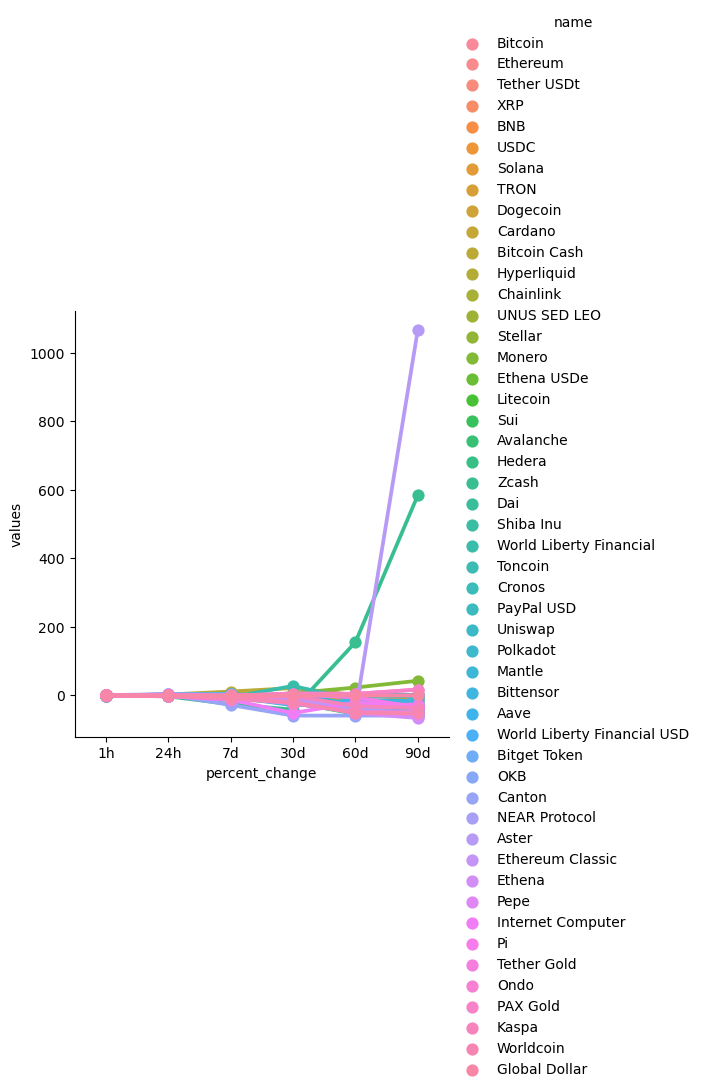

In [31]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [34]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name =='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,89709.59938,2025-12-06 21:47:46.027363
50,Bitcoin,89709.59938,2025-12-06 21:47:49.190276
100,Bitcoin,89726.40938,2025-12-06 21:48:50.315577


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

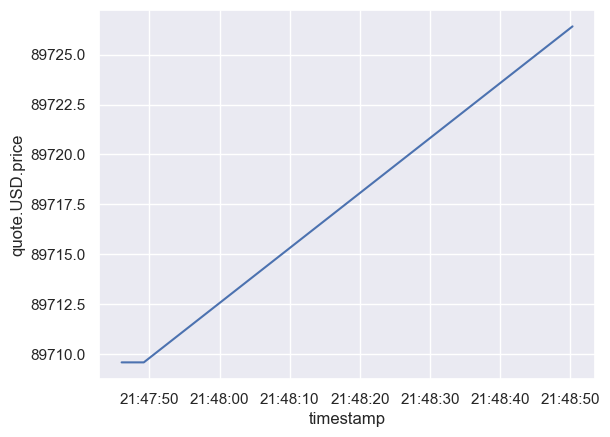

In [36]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)


## This project automates crypto tracking to avoid missing important market moves in a 24/7 environment, using reliable APIs to ensure accurate real-time data. By focusing only on key metrics like price change, volume, and market cap, it keeps the dashboard clean and meaningful, while a simple Daily Market Trend Snapshot visual quickly highlights overall direction and top movers. This real-time structure also makes it easier to spot volatility early, giving users faster insight without unnecessary complexity.